In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [7]:
sns.set(
    font_scale =2,
    style      ="whitegrid",
    rc         ={'figure.figsize':(20,7)}
)

In [16]:
sales_team  = pd.read_csv('../data/sales_team.csv')
order_leads = pd.read_csv('../data/order_leads.csv', parse_dates=['Date'])
invoices    = pd.read_csv('../data/invoices.csv', parse_dates=['Date of Meal'])

In [17]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [18]:
order_leads.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [19]:
invoices.head()

,Meal Id,Company Id,Date of Meal,Participants,Meal Price
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,['Violet Medina'],598.0
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,['Connie Harper'],89.0
2,ZDQ15BT9LLWUQ6M8,D0AUXPP07H6AVSGD,2014-12-18 20:00:00,['Arthur Lopez'],295.0
3,GL1ZVDU85Q9EO4TA,D0AUXPP07H6AVSGD,2018-03-05 12:00:00,['Violet Medina' 'Arthur Lopez'],193.0
4,42GWYA5XD8NVINY3,D0AUXPP07H6AVSGD,2017-06-17 08:00:00,['Arthur Lopez'],348.0


In [21]:
sales_team = sales_team.rename(columns={'Company Name': 'Company_Name', 
                                        'Company Id'  : 'Company_Id', 
                                        'Sales Rep'   : 'Sales_Rep', 
                                        'Sales Rep Id': 'Sales_Rep_Id'})
sales_team

,Sales_Rep,Sales_Rep_Id,Company_Name,Company_Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3
...,...,...,...,...
4614,Ida Woodward,LF3CPWWZKSNB1AXI,Unauthorized Increases,654ZMAXSV11BOMMI
4615,Ida Woodward,LF3CPWWZKSNB1AXI,Atom-Like Principle,42AO6UOXN0GXVHFQ
4616,Ida Woodward,LF3CPWWZKSNB1AXI,Congratulatory Economist,4B714VS0FWLGBSMU
4617,Ida Woodward,LF3CPWWZKSNB1AXI,Readable Pilots,G4D892KB5W0UCPR4


In [23]:
order_leads = order_leads.rename(columns={'Order Id': 'Order_Id', 
                                          'Company Id': 'Company_Id', 
                                          'Company Name': 'Company_Name', 
                                          'Order Value': 'Order_Value'})
order_leads

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0
...,...,...,...,...,...,...
99995,HKZFX556ZQRZJZWR,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-11-06,7516,0
99996,962CSDMAJ49E0CRK,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2018-08-02,442,1
99997,ZW7RO9TLL6EVVJEC,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2014-11-02,8544,0
99998,LNKGIWMZ9RT49IE9,APH243SK72T90MPS,Trade-Preparatory Quarterbacks,2017-04-01,6650,0


### График CR по дням

In [24]:
cr_by_day = order_leads.\
                        groupby(['Date']) \
                        .agg({'Converted': 'mean'}) \
                        .rename(columns={'Converted': 'CR'}) \
                        .sort_values('Date')
cr_by_day

,CR
Date,
2014-01-01,0.229167
2014-01-02,0.230769
2014-01-03,0.116667
2014-01-04,0.178571
2014-01-05,0.140000
...,...
2018-12-27,0.109091
2018-12-28,0.139535
2018-12-29,0.132075


<Axes: xlabel='Date'>

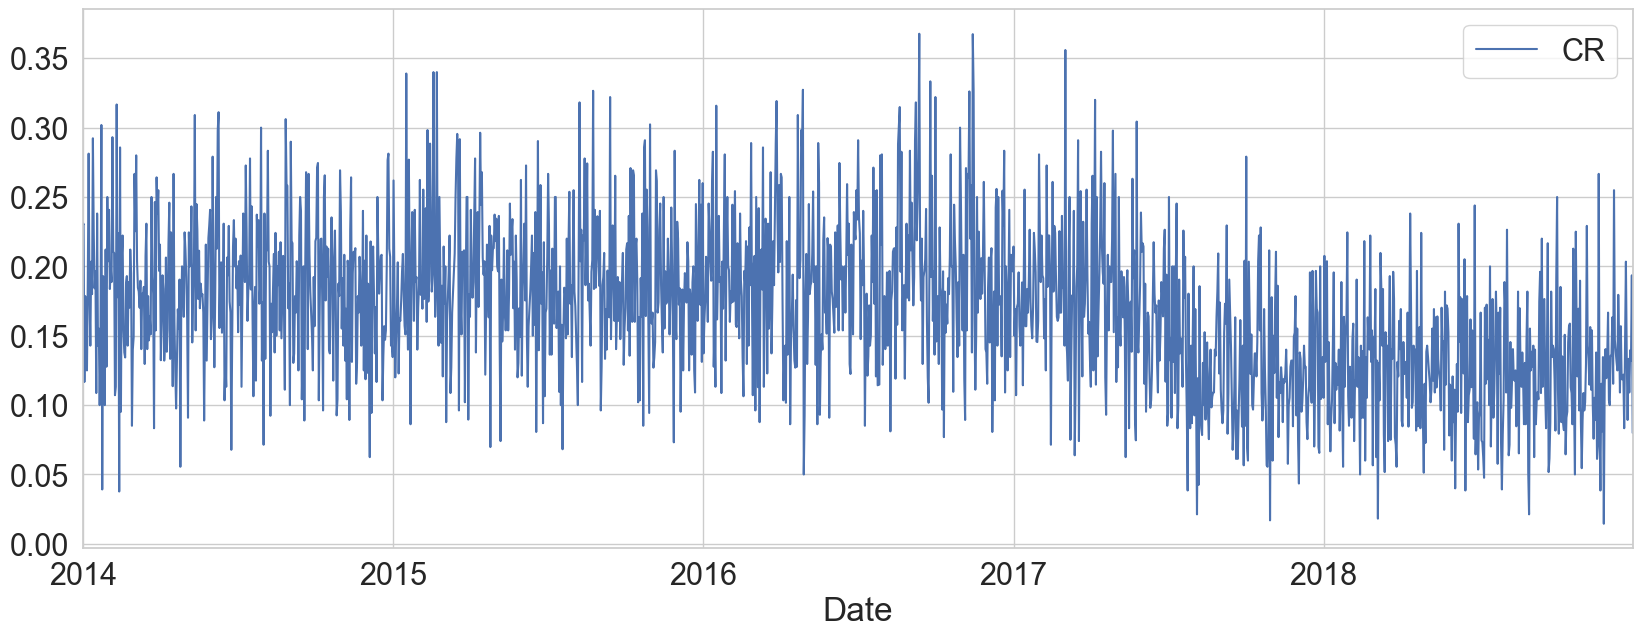

In [25]:
cr_by_day.plot()

Убираем "шум" скользящей средней (30)

<Axes: xlabel='Date'>

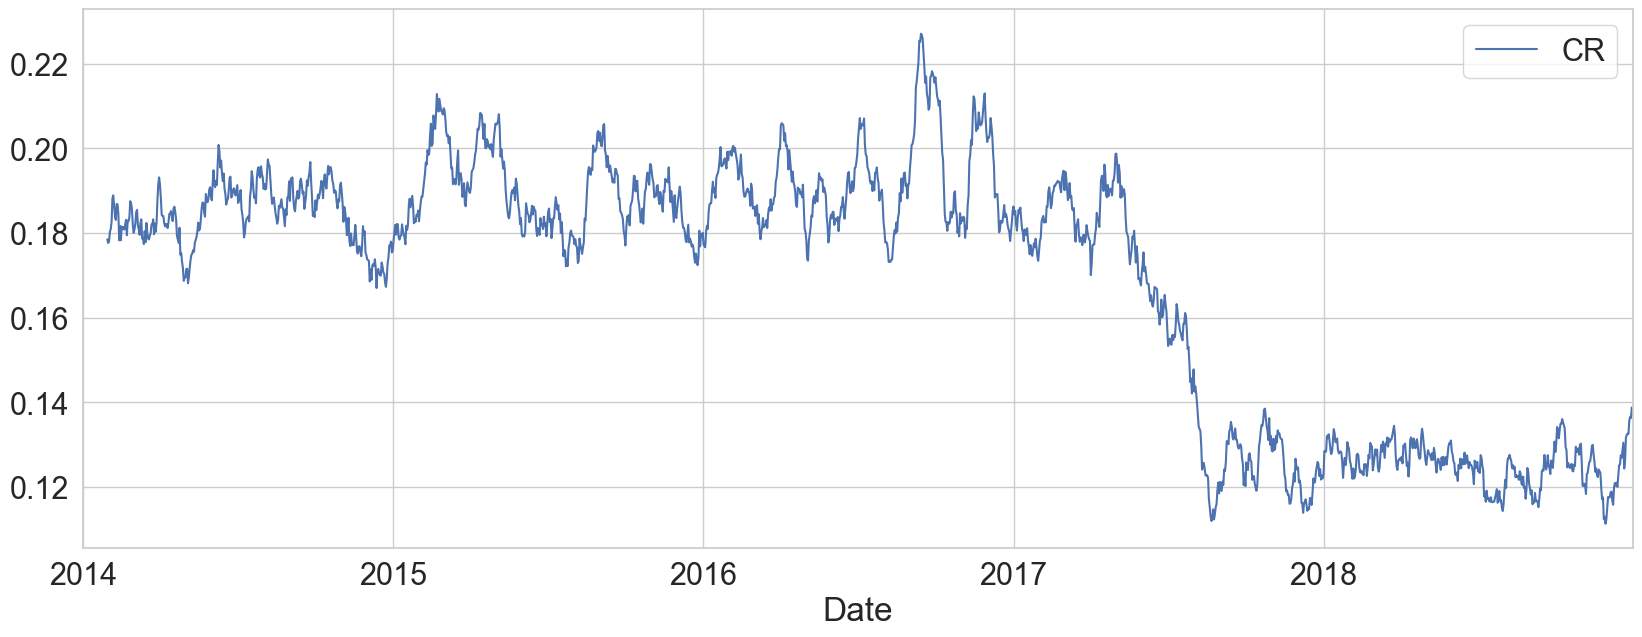

In [29]:
cr_by_day_rolling = cr_by_day.rolling(30).mean()
cr_by_day_rolling.plot()

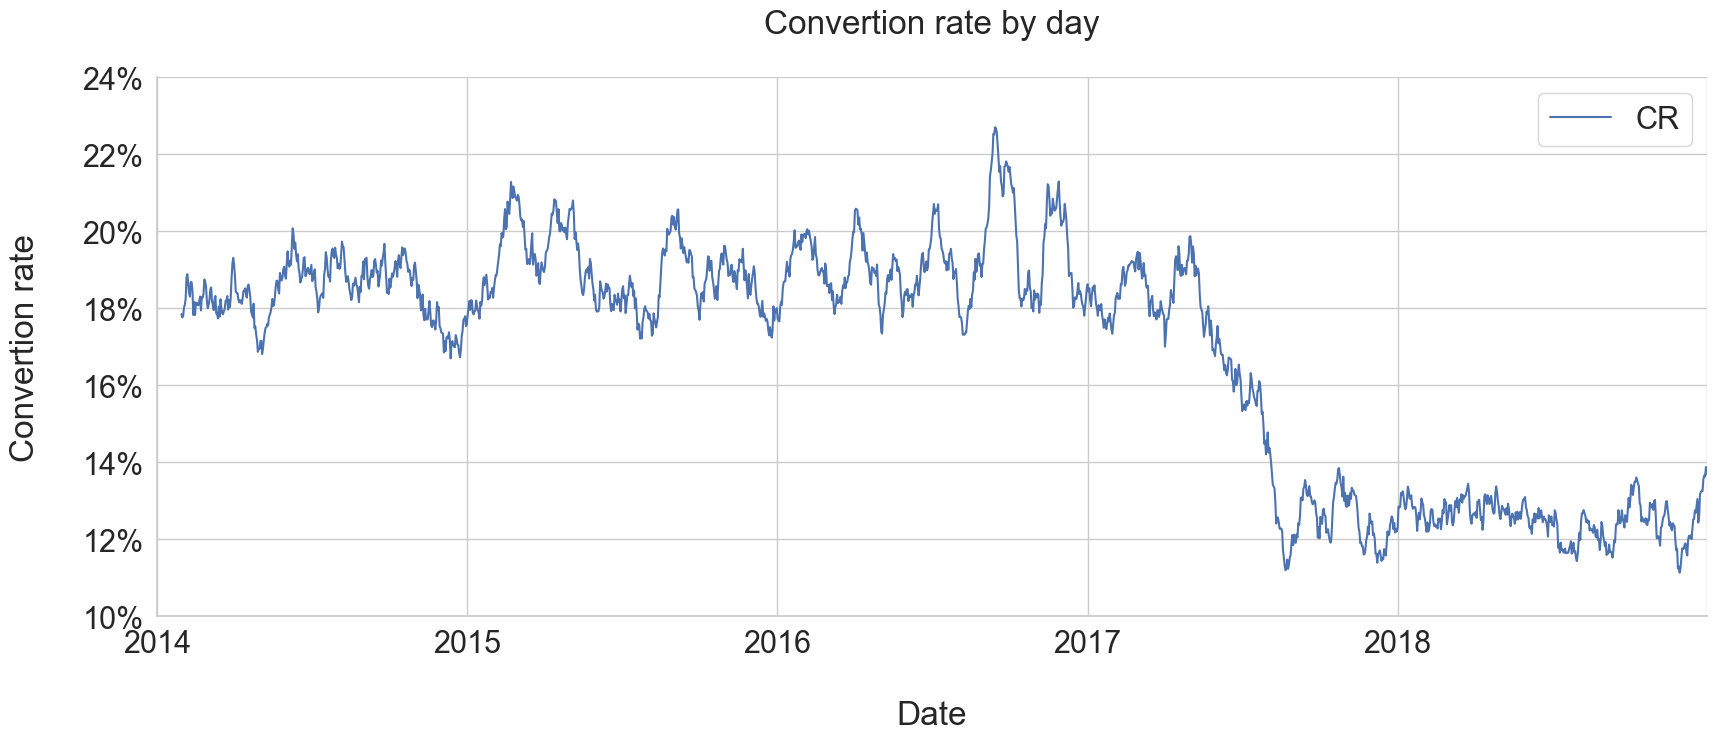

In [33]:
ax = cr_by_day_rolling.plot()
ax.set_title('Convertion rate by day\n')
ax.set_ylabel('Convertion rate\n')
ax.set_xlabel('\nDate')

yticks = ax.get_yticks()
ax.set_yticks(yticks)

ax.set_yticklabels(['{:.0%}'.format(n) for n in yticks])
sns.despine()

In [35]:
def get_plot(df, x_label='', y_label='', title=''):
    ax = df.plot()

    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    yticks = ax.get_yticks()
    ax.set_yticks(yticks)

    ax.set_yticklabels(['{:.0%}'.format(n) for n in yticks])
    sns.despine()

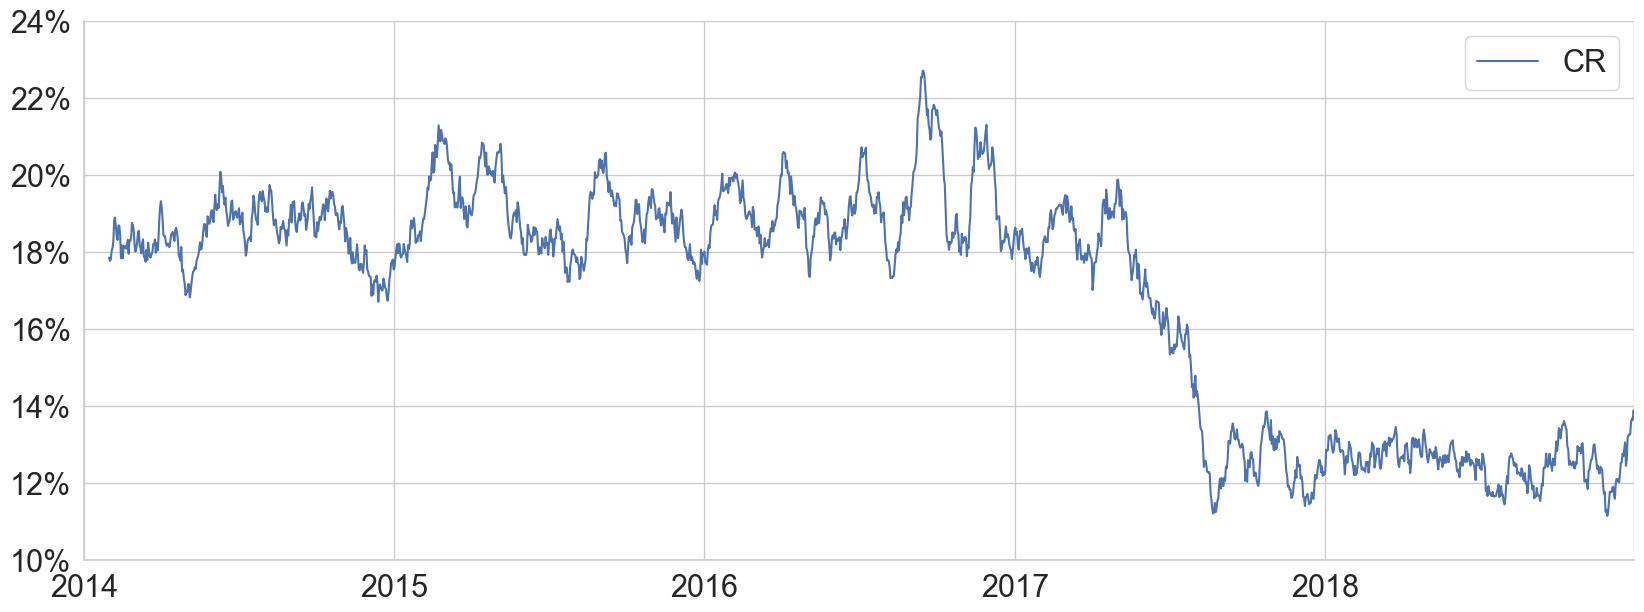

In [56]:
get_plot(cr_by_day_rolling)

In [48]:
cr_by_day_rolling_ = cr_by_day_rolling.reset_index().dropna()
cr_by_day_rolling_.head()

,Date,CR
29,2014-01-30,0.178512
30,2014-01-31,0.177663
31,2014-02-01,0.177996
32,2014-02-02,0.180229
33,2014-02-03,0.180944


In [44]:
fig = px.line(cr_by_day_rolling_, x='Date', y='CR', title='Convertion rate by day\n')
fig.show()

In [46]:
order_leads_with_team_data = order_leads.merge(sales_team, how='left', on=['Company_Name', 'Company_Id'])

In [49]:
order_leads_with_team_data.head()

,Order_Id,Company_Id,Company_Name,Date,Order_Value,Converted,Sales_Rep,Sales_Rep_Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [50]:
top_sales = order_leads_with_team_data\
                                        .groupby(['Sales_Rep'], as_index=False) \
                                        .agg({'Converted': 'mean'}) \
                                        .sort_values('Converted') \
                                        .tail(10)
top_sales

,Sales_Rep,Converted
346,Nick Allen,0.298507
192,Jennifer Peck,0.304348
468,Thomas Lindsey,0.304348
187,Jason Miller,0.307692
455,Teddy Cook,0.315789
225,Jose Gaines,0.326087
249,Katie Rodriquez,0.333333
466,Thomas Fortner,0.352941
438,Sierra Garcia,0.363636
151,Ginger Wright,0.368421


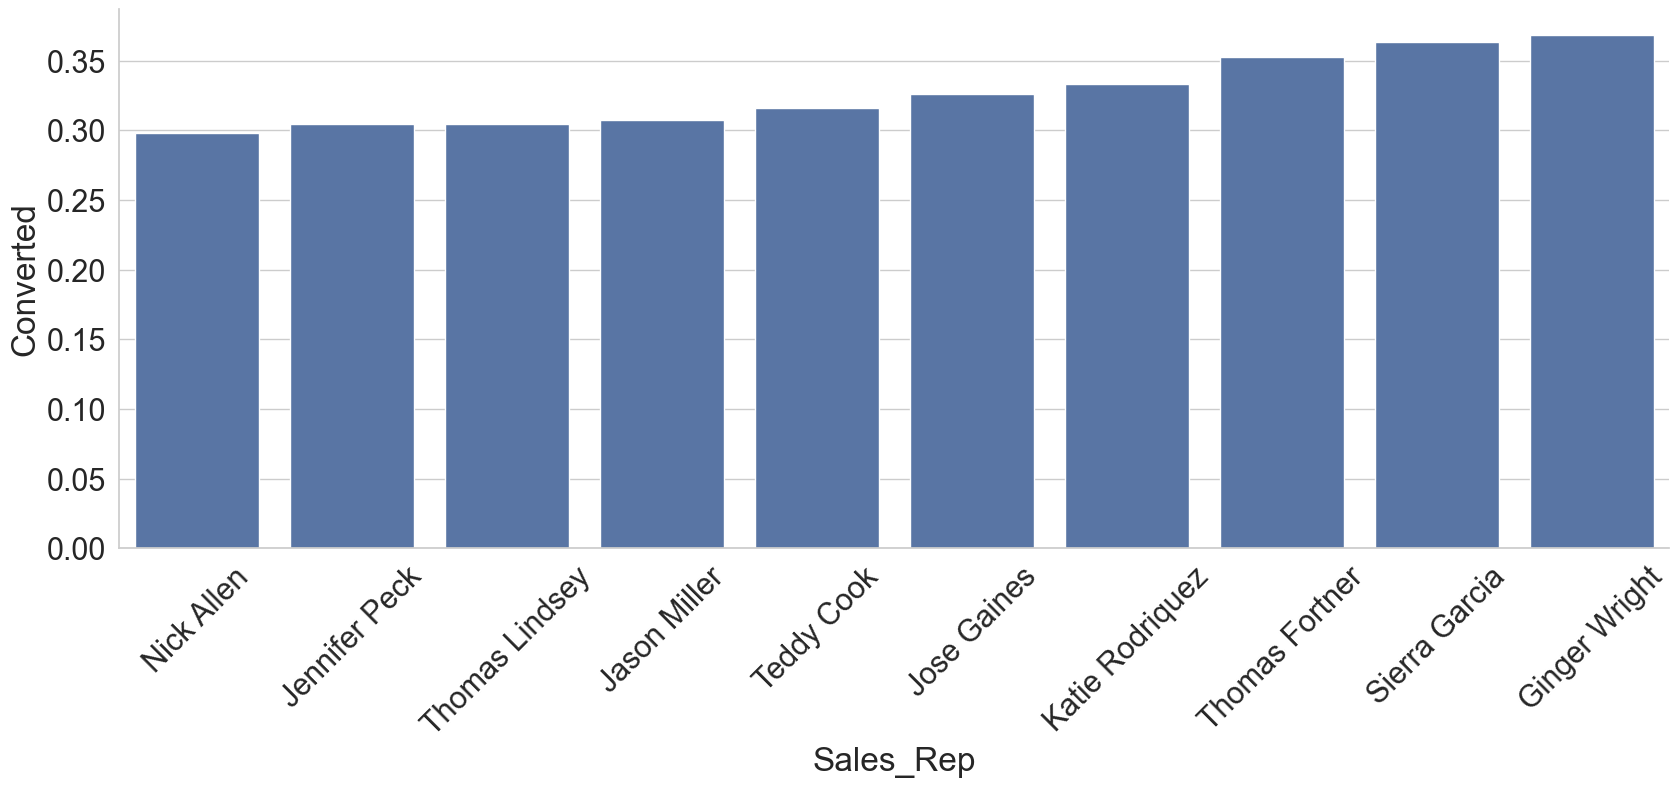

In [62]:
ax = sns.barplot(data=top_sales, y='Converted', x='Sales_Rep')
# Retrieve the current x-tick locations
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(top_sales.Sales_Rep, rotation=45)
sns.despine()

In [64]:
all_sales = order_leads_with_team_data\
                                        .groupby(['Sales_Rep'], as_index=False) \
                                        .agg({'Converted': 'mean'}) \
                                        .sort_values('Converted')
all_sales.head()

,Sales_Rep,Converted
383,Richard Nicols,0.055556
188,Jason Rogers,0.076923
224,Jon Adams,0.085714
116,Elijah Valenti,0.094444
36,Beatrice Mccormick,0.095238


<Axes: xlabel='Converted', ylabel='Count'>

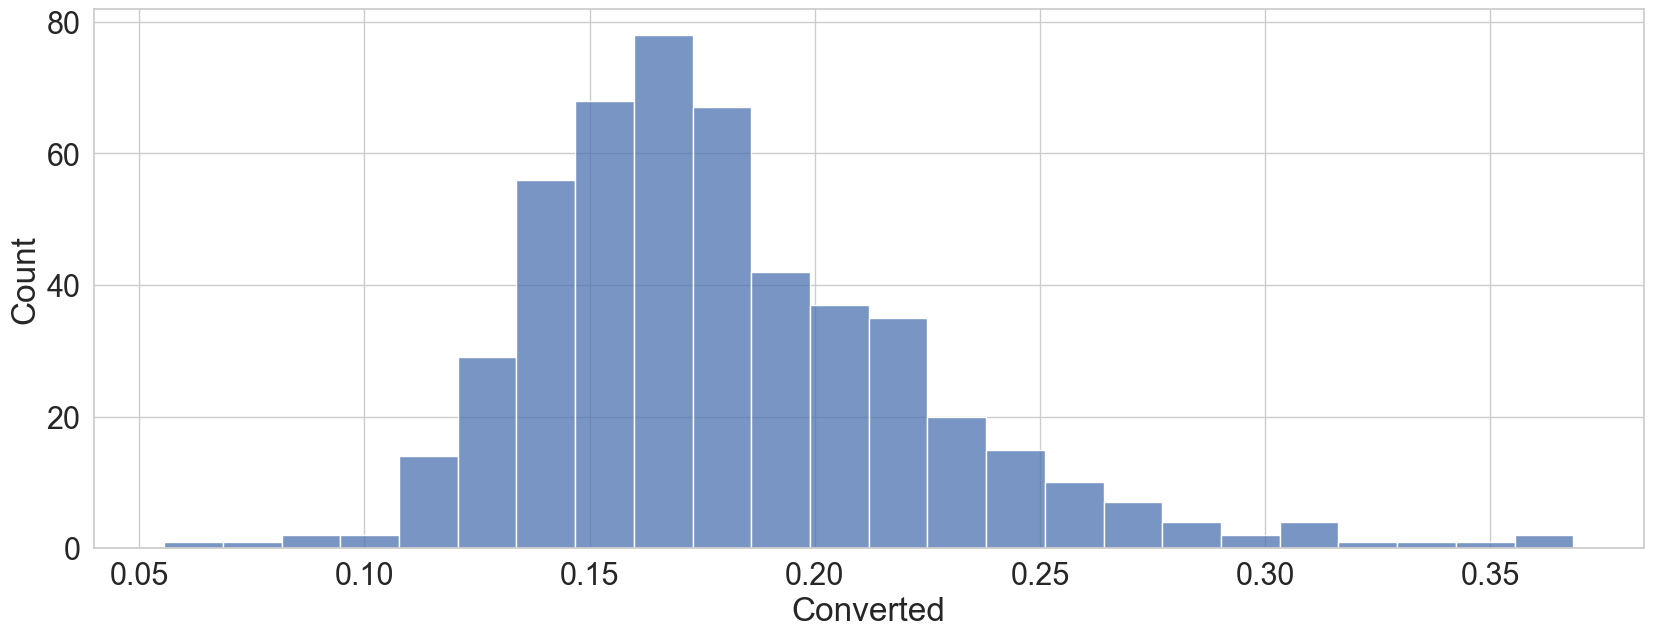

In [84]:
sns.histplot(all_sales.Converted, kde=False)

# Домашнее задание

### 1) Посчитайте скользящее среднее цены авокадо (AveragePrice) с окном равным 3 (window).
Чему равно максимальное значение? Ответ округлите до 2 знаков после точки.

Имеется следующий набор данных от Hass Avocado Board 🥑:

            Date — дата
            AveragePrice — средняя цена одного авокадо
            Total Volume — количество проданных авокадо
            4046 — количество проданных авокадо PLU* 4046
            4225 — количество проданных авокадо PLU 4225
            4770 — количество проданных авокадо PLU 4770
            Total Bags — всего упаковок
            Small Bags — маленькие упаковки
            Large Bags — большие
            XLarge Bags — очень большие
            type — обычный или органический
            year — год
            Region — город или регион the city or region of the observation
            *PLU — код товара (Product Lookup code)

*В датафрейме находятся данные не за каждый день, а за конец каждой недели.
Для каждой даты есть несколько наблюдений, отличающихся по типу авокадо и региону продажи.
Предположим, что нас это разделение не интересует, поэтому в avocado_mean записаны агрегированные данные.

In [3]:
avocado_mean = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv', index_col=0, parse_dates=['Date'] ).squeeze("columns")
avocado_mean

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

In [4]:
avocado_mean.rolling(3, min_periods=1).mean().max().round(2)

1.85

### 2) Постройте графики скользящего среднего с разными значениями параметра window (2, 4, 10, 50).

In [5]:
# avo_mean_2 = avocado_mean.rolling(2).mean()
# avo_mean_4 = avocado_mean.rolling(4).mean()
# avo_mean_10 = avocado_mean.rolling(10).mean()
# avo_mean_50 = avocado_mean.rolling(50).mean()

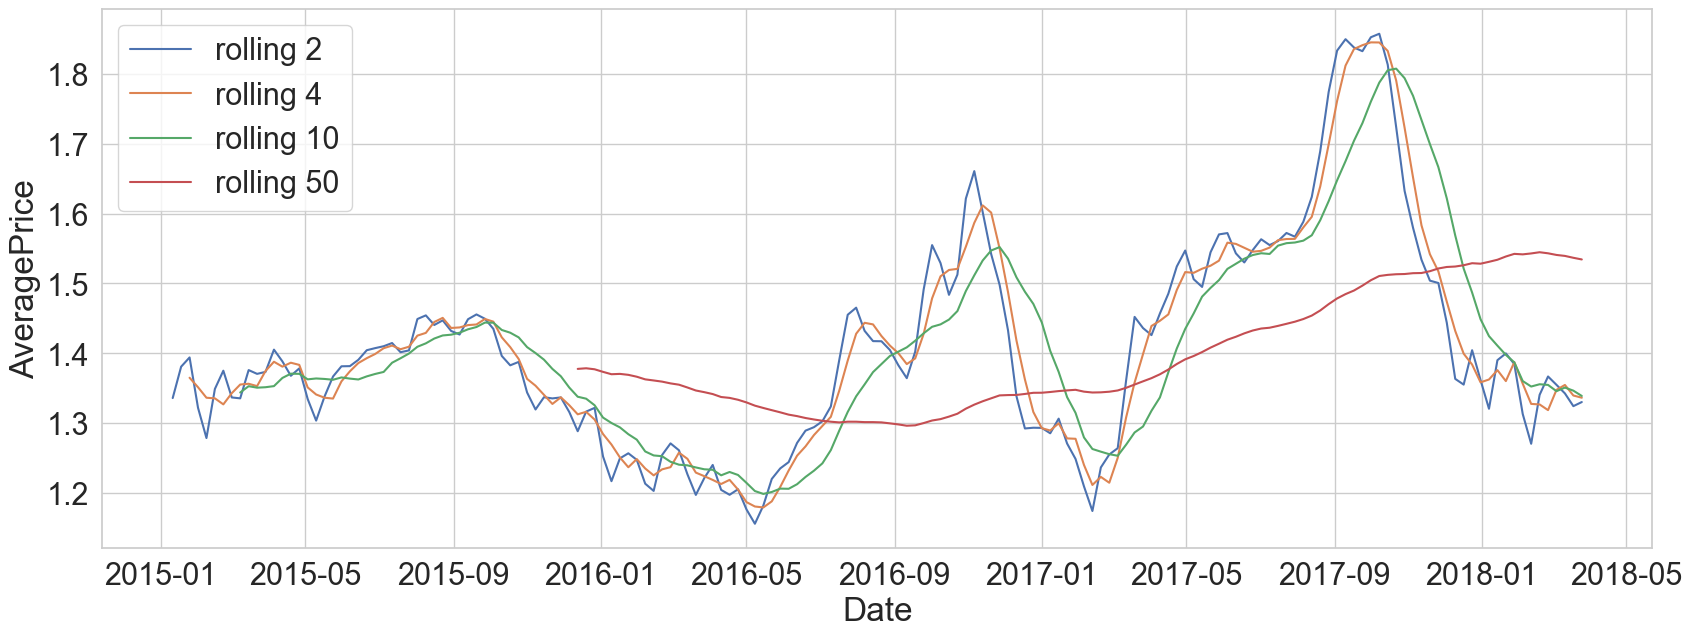

In [8]:
# sns.lineplot(x=avo_mean_2.index, y=avo_mean_2, label='rolling 2')
# sns.lineplot(x=avo_mean_4.index, y=avo_mean_4, label='rolling 4')
# sns.lineplot(x=avo_mean_10.index, y=avo_mean_10, label='rolling 10')
# sns.lineplot(x=avo_mean_50.index, y=avo_mean_50, label='rolling 50')

windows = [2, 4, 10, 50]

for window in windows:
    tdf = avocado_mean.rolling(window).mean()
    sns.lineplot(x=tdf.index, y=tdf, label=f'rolling {window}')

### 3) Используйте агрегированные данные avocado_mean.csv о ценах на авокадо и примените функцию ewm() с параметром span=2, чтобы получить экспоненциальное скользящее среднее.
Запишите результат в avocado_ewm.

In [11]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm

Date
2015-01-04    1.301296
2015-01-11    1.353310
2015-01-18    1.379480
2015-01-25    1.391394
2015-02-01    1.294758
                ...   
2018-02-25    1.356212
2018-03-04    1.352194
2018-03-11    1.340793
2018-03-18    1.322734
2018-03-25    1.338812
Name: AveragePrice, Length: 169, dtype: float64

In [12]:
avocado_exp = avocado_mean.expanding().mean()
avocado_exp

Date
2015-01-04    1.301296
2015-01-11    1.335972
2015-01-18    1.354352
2015-01-25    1.365046
2015-02-01    1.341444
                ...   
2018-02-25    1.407673
2018-03-04    1.407327
2018-03-11    1.406894
2018-03-18    1.406340
2018-03-25    1.405988
Name: AveragePrice, Length: 169, dtype: float64

### 4) Постройте графики для авокадо типа organic (type) в Чикаго (region) посчитайте скользящее среднее с окном 4 и экспоненциальное скользящее среднее с параметром span=4.
Импортируйте полные данные, (avocado_full.csv) указав index_col=0 (использовать первую колонку как индекс).

In [13]:
avocado = pd.read_csv('https://stepik.org/media/attachments/lesson/362453/avocado_full.csv', index_col=0, parse_dates=['Date'])
avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral


In [15]:
organic_chicago = avocado.query('type == "organic" and region == "Chicago"')
organic_chicago

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.00,0.0,organic,2015,Chicago
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.00,0.0,organic,2015,Chicago
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.00,0.0,organic,2015,Chicago
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-25,1.68,36432.65,246.73,29263.75,0.0,6922.17,6908.84,13.33,0.0,organic,2018,Chicago
2018-03-04,1.62,46026.58,1107.05,35255.03,0.0,9664.50,9654.50,10.00,0.0,organic,2018,Chicago
2018-03-11,1.66,41969.83,583.18,32382.95,0.0,9003.70,8990.36,13.34,0.0,organic,2018,Chicago


In [17]:
organic_chicago['rolling'] = organic_chicago.AveragePrice.rolling(4).mean()

C:\Users\R\AppData\Local\Temp\ipykernel_13896\2848621075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_chicago['rolling'] = organic_chicago.AveragePrice.rolling(4).mean()


In [18]:
organic_chicago['ewm'] = organic_chicago.AveragePrice.ewm(span=4).mean()

C:\Users\R\AppData\Local\Temp\ipykernel_13896\322051468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_chicago['ewm'] = organic_chicago.AveragePrice.ewm(span=4).mean()


In [19]:
organic_chicago.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,rolling,ewm
Date,,,,,,,,,,,,,,
2015-01-04,1.49,17723.17,1189.35,15628.27,0.0,905.55,905.55,0.0,0.0,organic,2015,Chicago,NaN,1.490000
2015-01-11,1.79,12915.74,1426.75,10900.10,0.0,588.89,588.89,0.0,0.0,organic,2015,Chicago,NaN,1.677500
2015-01-18,1.81,12499.87,1154.81,10830.61,0.0,514.45,514.45,0.0,0.0,organic,2015,Chicago,NaN,1.745102
2015-01-25,1.83,10951.51,711.63,9515.44,0.0,724.44,724.44,0.0,0.0,organic,2015,Chicago,1.7300,1.784118
2015-02-01,1.52,14391.05,1363.35,11835.47,0.0,1192.23,1192.23,0.0,0.0,organic,2015,Chicago,1.7375,1.669563


<Axes: xlabel='Date'>

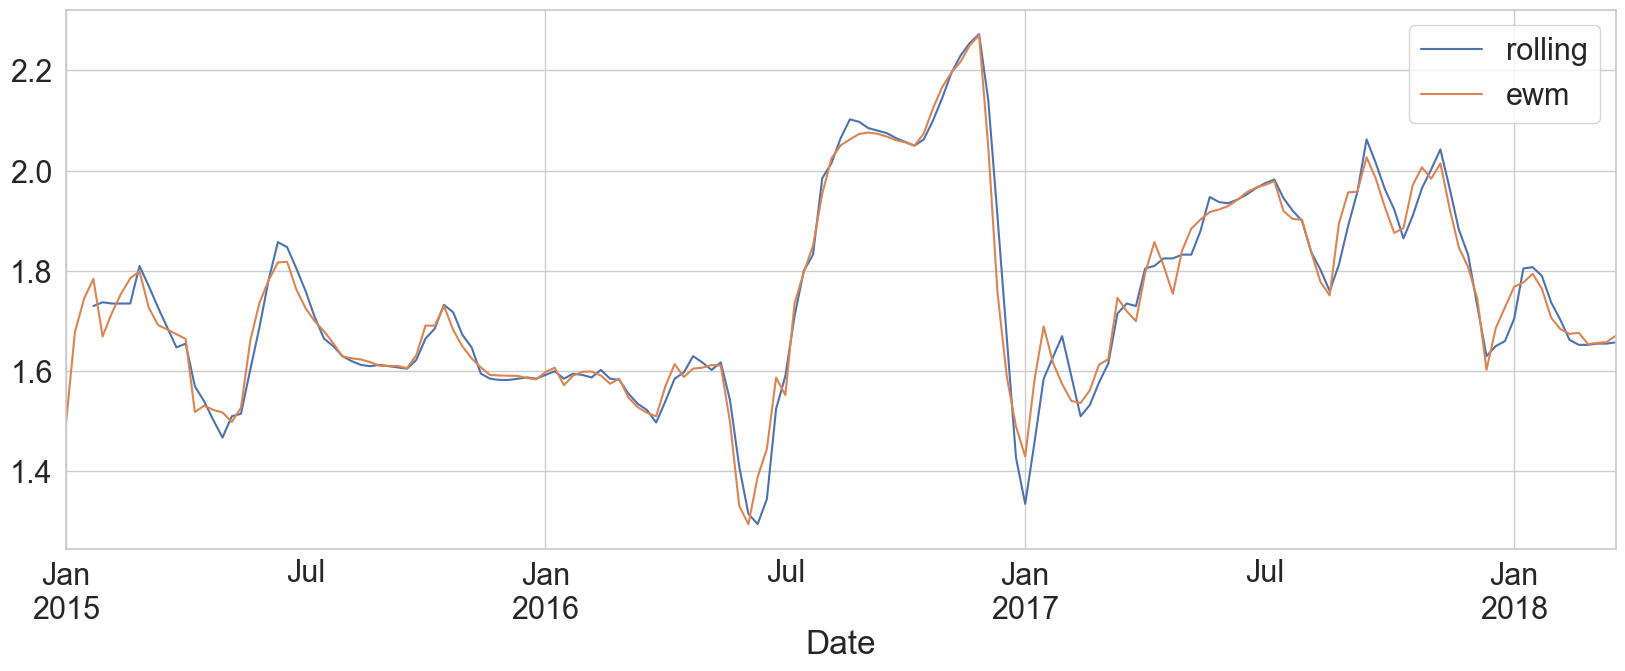

In [20]:
organic_chicago[['rolling', 'ewm']].plot()

In [21]:
organic_chicago.loc['2015-01-18', 'ewm']

1.7451020408163265

In [23]:
organic_chicago.loc['2015-01-18':'2015-02-01', 'rolling']

Date
2015-01-18       NaN
2015-01-25    1.7300
2015-02-01    1.7375
Name: rolling, dtype: float64

In [24]:
organic_chicago.loc['2015-01-25', 'AveragePrice':'4770']

AveragePrice        1.83
Total Volume    10951.51
4046              711.63
4225             9515.44
4770                 0.0
Name: 2015-01-25 00:00:00, dtype: object

### 5) В файле delays находится информация о том какие компании с кем и на какую сумму заключали сделки, а самое важное – насколько они при этом опоздали. Вот сабсэт данных

 		client_idcompany_id	delay		revenue
 	0	2389	4240	-1 days -14:57:48.000000000	705436
 	1	7614	9544	-4 days -02:14:23.000000000	859266
 	2	2052	2427	-0 days -06:08:57.000000000	812416
 	3	9635	8054	-0 days -23:40:19.000000000	162312
 	4	8154	5503	-1 days -13:21:53.000000000	658844

Сначала давайте переведём delay в timedelta формат. Обратите внимание, что так просто столбец не переведётся – нужно будет убрать -. Сохраните данные в переменную df, отформатируйте колонку нужным способом (подсказка – уберите -) и переведите её в тип timedelta.
Могут понадобиться:
pd.to_timedelta()
pd.Series.str

In [40]:
df = pd.read_csv('https://stepik.org/media/attachments/course/72204/delays.csv')
df

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844
...,...,...,...,...
259,5837,2617,-0 days -05:32:08.000000000,602129
260,2384,2364,-3 days -23:27:14.000000000,910660
261,5146,3331,-1 days -15:22:34.000000000,401137
262,7203,5532,-2 days -17:15:02.000000000,308979


In [41]:
pd.to_timedelta('-1 days -14:57:48.000000000')

ValueError: only leading negative signs are allowed

In [42]:
pd.to_timedelta('-1 days 14:57:48.000000000')

Timedelta('-1 days +14:57:48')

In [43]:
pd.to_timedelta('-1 days 14:57:48.000000000').total_seconds() / (60 * 60)

-9.036666666666667

In [44]:
pd.to_timedelta('1 days 14:57:48.000000000').total_seconds() / (60 * 60)

38.96333333333333

Требуется убрать минусы для корректных значений

In [45]:
'-1 days -14:57:48.000000000'.replace('-', '')

'1 days 14:57:48.000000000'

In [48]:
df['delay'] = pd.to_timedelta(df.delay.str.replace('-', ''))

In [49]:
df.dtypes

client_id               int64
company_id              int64
delay         timedelta64[ns]
revenue                 int64
dtype: object

### 6) Время это хорошо, но хотелось бы также разбить его на промежутки. Разбейте время на 3 интервала и поместите соответствующие значения в колонку delay_categorical

In [65]:
df['delay_categorical'] = pd.cut(x = df.delay, bins=3)

In [66]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
1,7614,9544,4 days 02:14:23,859266,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
2,2052,2427,0 days 06:08:57,812416,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
3,9635,8054,0 days 23:40:19,162312,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
4,8154,5503,1 days 13:21:53,658844,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
260,2384,2364,3 days 23:27:14,910660,"(3 days 08:05:36.333333333, 4 days 23:51:14]"
261,5146,3331,1 days 15:22:34,401137,"(0 days 00:27:11.587000, 1 days 16:19:58.66666..."
262,7203,5532,2 days 17:15:02,308979,"(1 days 16:19:58.666666666, 3 days 08:05:36.33..."


### 7) Разбилось конечно неплохо, но хочется чуть более целые значения и более человеческие названия. В этом нам помогут аргументы функции pd.cut! Перезадайте колонку delay_categorical, чтобы значения в ней были
            'less than 1 day' – время от 0 до 1 дня
            '1-2 days' – от 1 до 2 дней
            '2-3 days' – от 2 до 3 дней
            'more than 3 days' – больше 3 дней
Например, для следующего примера

            client_id  company_id  delay            revenue
            14345      54631       2 days 13:34:45  145345
            54434      54834       1 days 08:26:00  453245
            34905      49834       0 days 00:26:03  14543
результом будет

            client_id  company_id  delay            revenue  delay_categorical
            14345      54631       2 days 13:34:45  145345   2-3 days
            54434      54834       1 days 08:26:00  453245   1-2 days
            34905      49834       0 days 00:26:03  14543    less than 1 day

In [67]:
bins = [
    pd.to_timedelta('0d'),
    pd.to_timedelta('1d'),
    pd.to_timedelta('2d'),
    pd.to_timedelta('3d'),
    pd.to_timedelta('100d')
]

In [68]:
labels=['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']

In [69]:
df['delay_categorical'] = pd.cut(df.delay, bins=bins, labels=labels)

In [70]:
df

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days
...,...,...,...,...,...
259,5837,2617,0 days 05:32:08,602129,less than 1 day
260,2384,2364,3 days 23:27:14,910660,more than 3 days
261,5146,3331,1 days 15:22:34,401137,1-2 days
262,7203,5532,2 days 17:15:02,308979,2-3 days


### 8) Теперь постройте интерактивный барплот с тем, насколько часто задерживаются сделки, выясните самый редкий и самый частый варианты.

<Axes: xlabel='delay_categorical', ylabel='count'>

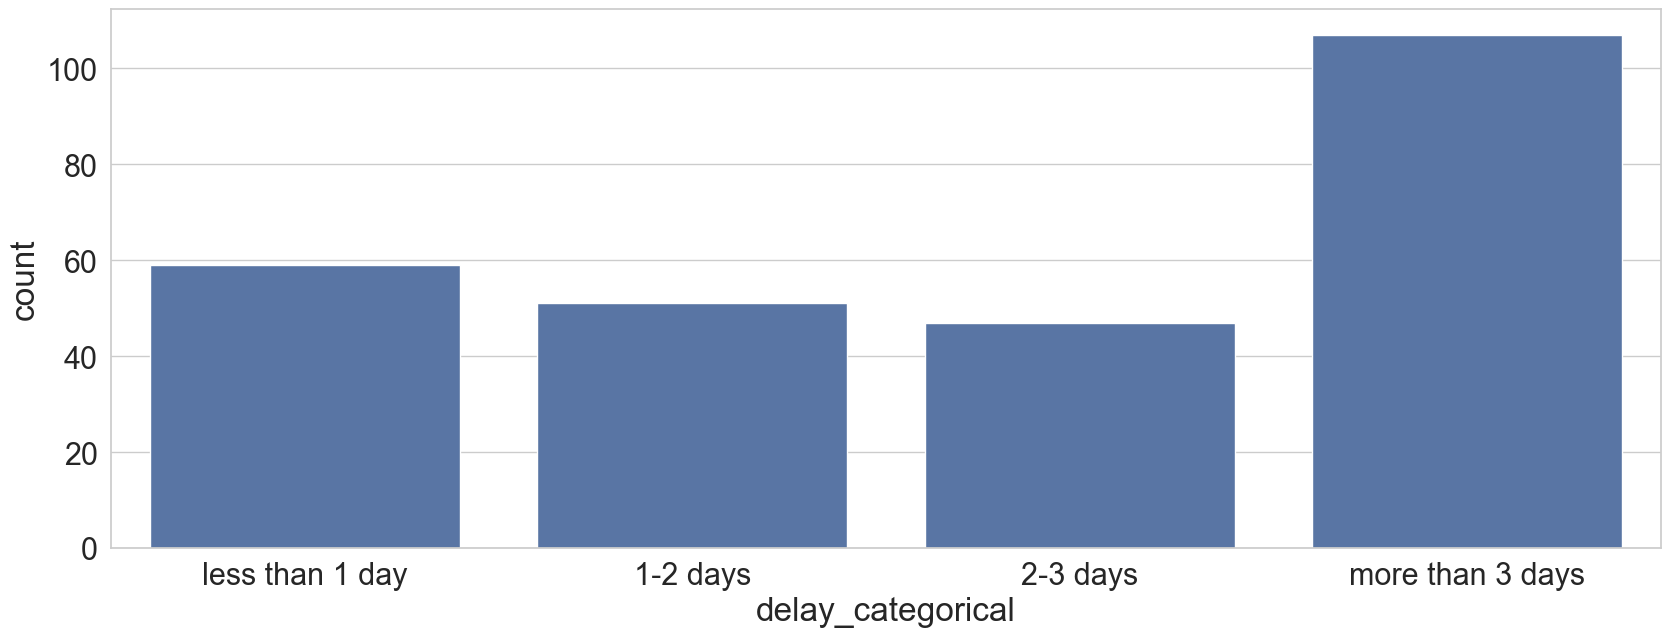

In [72]:
sns.countplot(data=df, x='delay_categorical')

In [82]:
counts = df.delay_categorical.value_counts()
counts

delay_categorical
more than 3 days    107
less than 1 day      59
1-2 days             51
2-3 days             47
Name: count, dtype: int64

In [96]:
category_orders={'delay_categorical': ['less than 1 day', '1-2 days', '2-3 days', 'more than 3 days']}

In [97]:
fig = px.bar(
    counts,
    x=counts.index,
    y=counts.values,
    category_orders=category_orders,
    title='Распределение по Категориям'
)

# Обновление меток осей
fig.update_layout(
    xaxis_title="Категория",
    yaxis_title="Количество"
)

# Отображение графика
fig.show()